## Bring in libraries and dataframes and set indexes

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
%matplotlib inline
import matplotlib.dates as mdates

## Updata data frame and traces and stream to Plotly

In [2]:
#Update Data Frame
FieldData = pd.read_pickle('.\FieldData.pkl')
#Calculate treatment means omitting data prior to 2014-11-05 08:00:00 to avoid NaN values
DataMeans =  FieldData.ix['2015-10-10':].groupby(level=['Measurement','Depth','Irrigation', 'Nitrogen'],axis=1).mean()
DataMeans =  DataMeans.dropna(axis=1) #For some reason it keeps non valid combinations in so need to extract with this function

#Calculate the water content of the soil profile by multiplying the volumetric water content by each layers
#depth and summing.  The 0-15 layers are divided by 2 to average the two readings
ProfileWater = DataMeans.VolumetricWaterContent.ix[:,'D1I'] * 150/2 + \
               DataMeans.VolumetricWaterContent.ix[:,'D1B'] * 150/2 + \
               DataMeans.VolumetricWaterContent.ix[:,'D2'] * 150 + \
               DataMeans.VolumetricWaterContent.ix[:,'D3'] * 300 + \
               DataMeans.VolumetricWaterContent.ix[:,'D4'] * 300 + \
               DataMeans.VolumetricWaterContent.ix[:,'D5'] * 300 + \
               DataMeans.VolumetricWaterContent.ix[:,'D6'] * 300 + \
               DataMeans.VolumetricWaterContent.ix[:,'D7'] * 300
                
FieldCapacity = ProfileWater.resample('D').max()
FieldCapacity = FieldCapacity.ix['2015-10-14'] +10 # I would have though this would return a data frame with a single row but instead it returns a series with a multiindex in columns
SoilWaterDeficit = -(FieldCapacity - ProfileWater)    # This calculation only works because field capacity is a multi index series

## Calculate soil water deficit

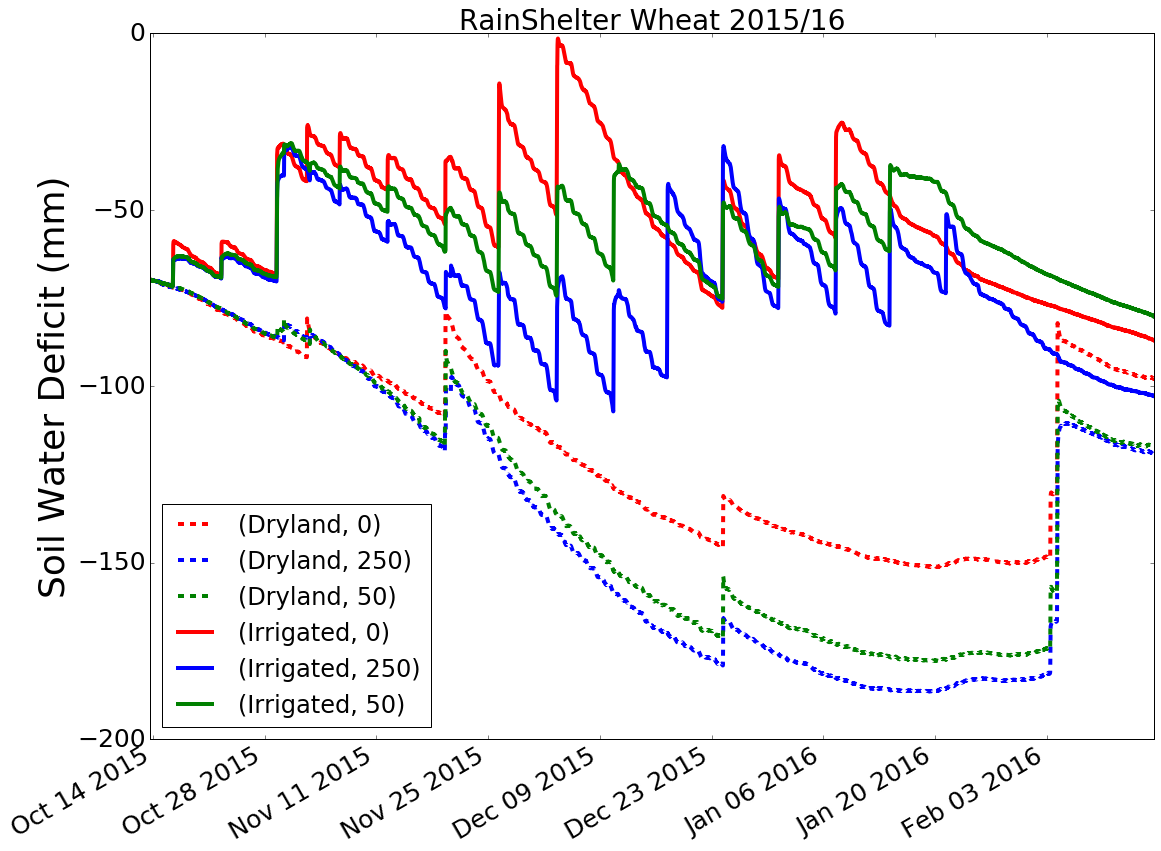

In [3]:
#Calculate treatment means omitting data prior to 2014-11-05 08:00:00 to avoid NaN values
DataMeans =  FieldData.ix['2015-10-10':].groupby(level=['Measurement','Depth','Irrigation', 'Nitrogen'],axis=1).mean()
DataMeans =  DataMeans.dropna(axis=1) #For some reason it keeps non valid combinations in so need to extract with this function

#Calculate the water content of the soil profile by multiplying the volumetric water content by each layers
#depth and summing.  The 0-15 layers are divided by 2 to average the two readings
ProfileWater = DataMeans.VolumetricWaterContent.ix[:,'D1I'] * 150/2 + \
               DataMeans.VolumetricWaterContent.ix[:,'D1B'] * 150/2 + \
               DataMeans.VolumetricWaterContent.ix[:,'D2'] * 150 + \
               DataMeans.VolumetricWaterContent.ix[:,'D3'] * 300 + \
               DataMeans.VolumetricWaterContent.ix[:,'D4'] * 300 + \
               DataMeans.VolumetricWaterContent.ix[:,'D5'] * 300 + \
               DataMeans.VolumetricWaterContent.ix[:,'D6'] * 300 + \
               DataMeans.VolumetricWaterContent.ix[:,'D7'] * 300
                
FieldCapacity = ProfileWater.resample('D').max()
FieldCapacity = FieldCapacity.ix['2015-10-14'] +70 # I would have though this would return a data frame with a single row but instead it returns a series with a multiindex in columns
SoilWaterDeficit = -(FieldCapacity - ProfileWater)    # This calculation only works because field capacity is a multi index series
SoilWaterDeficit.plot(figsize=(18,14),style=['r--','b--','g--','r-','b-','g-'], linewidth=4)
plt.ylabel('Soil Water Deficit (mm)', fontsize=36);
plt.tick_params(labelsize=25)
plt.title('RainShelter Wheat 2015/16', fontsize=28);
plt.legend(fontsize=24, loc=3)

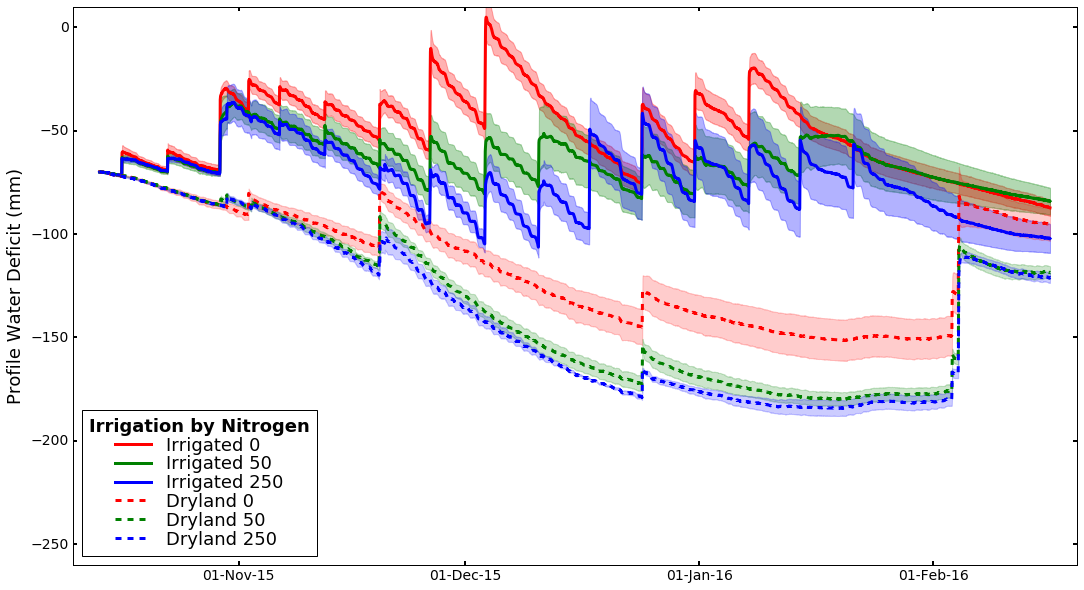

In [5]:
DataMeans2 = FieldData.ix['2015-10-10':,'VolumetricWaterContent'].groupby(level=['Depth', 'Irrigation', 'Nitrogen','Block'],axis=1).mean()
DataMeans2 =  DataMeans2.dropna(axis=1, how = 'all')

#Calculate the water content of the soil profile by multiplying the volumetric water content by each layers
#depth and summing.  The 0-15 layers are divided by 2 to average the two readings
ProfileWater2 = DataMeans2.ix[:,'D1I'] * 150/2 + \
               DataMeans2.ix[:,'D1B'] *150/2 + \
               DataMeans2.ix[:,'D2'] * 150 + \
               DataMeans2.ix[:,'D3'] * 300 + \
               DataMeans2.ix[:,'D4'] * 300 + \
               DataMeans2.ix[:,'D5'] * 300 + \
               DataMeans2.ix[:,'D6'] * 300 + \
               DataMeans2.ix[:,'D7'] * 300
                
FieldCapacity2 = ProfileWater2.resample('D').max()
FieldCapacity2 = FieldCapacity2.ix['2015-10-14'] + 70
SoilWaterDeficit2 = -(FieldCapacity2 - ProfileWater2)

Irrigations = ['Irrigated','Dryland']
Nitrogens = ['0', '50','250']
lines = ['-','--']
colors = ['r','g','b']
alphas = [0.3,0.2]

Graph = plt.figure(figsize=(18,10))
fig = Graph.add_subplot(1,1,1)
CulPos = 0
for Irr in Irrigations:
    IrrPos = 0
    for Nit in Nitrogens:
        Ind = SoilWaterDeficit2.ix[:,(Irr,Nit)].index
        Med = SoilWaterDeficit2.ix[:,(Irr,Nit)].median(axis=1)
        SEM = SoilWaterDeficit2.ix[:,(Irr,Nit)].std(axis=1)/np.sqrt(4)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=alphas[CulPos])
        plt.plot(Ind,Med,lines[CulPos],color=colors[IrrPos], linewidth = 3,label = Irr + ' ' + Nit)
        IrrPos += 1
    CulPos+=1
    plt.ylabel('Profile Water Deficit (mm)', fontsize=18)
    plt.tick_params(labelsize=14,width=2,length=4)    

plt.ylim(-260,10)
plt.xlim('2015-10-10','2016-02-20')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ledg = plt.legend(loc=3,numpoints=1,fontsize = 18,labelspacing = 0.05, 
                          title='Irrigation by Nitrogen')
ledg.get_title().set_fontsize(18)
ledg.get_title().set_weight('bold')
plt.tight_layout
plt.savefig('SWD.jpg',dpi=400)

C:\Anaconda\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning:

The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.



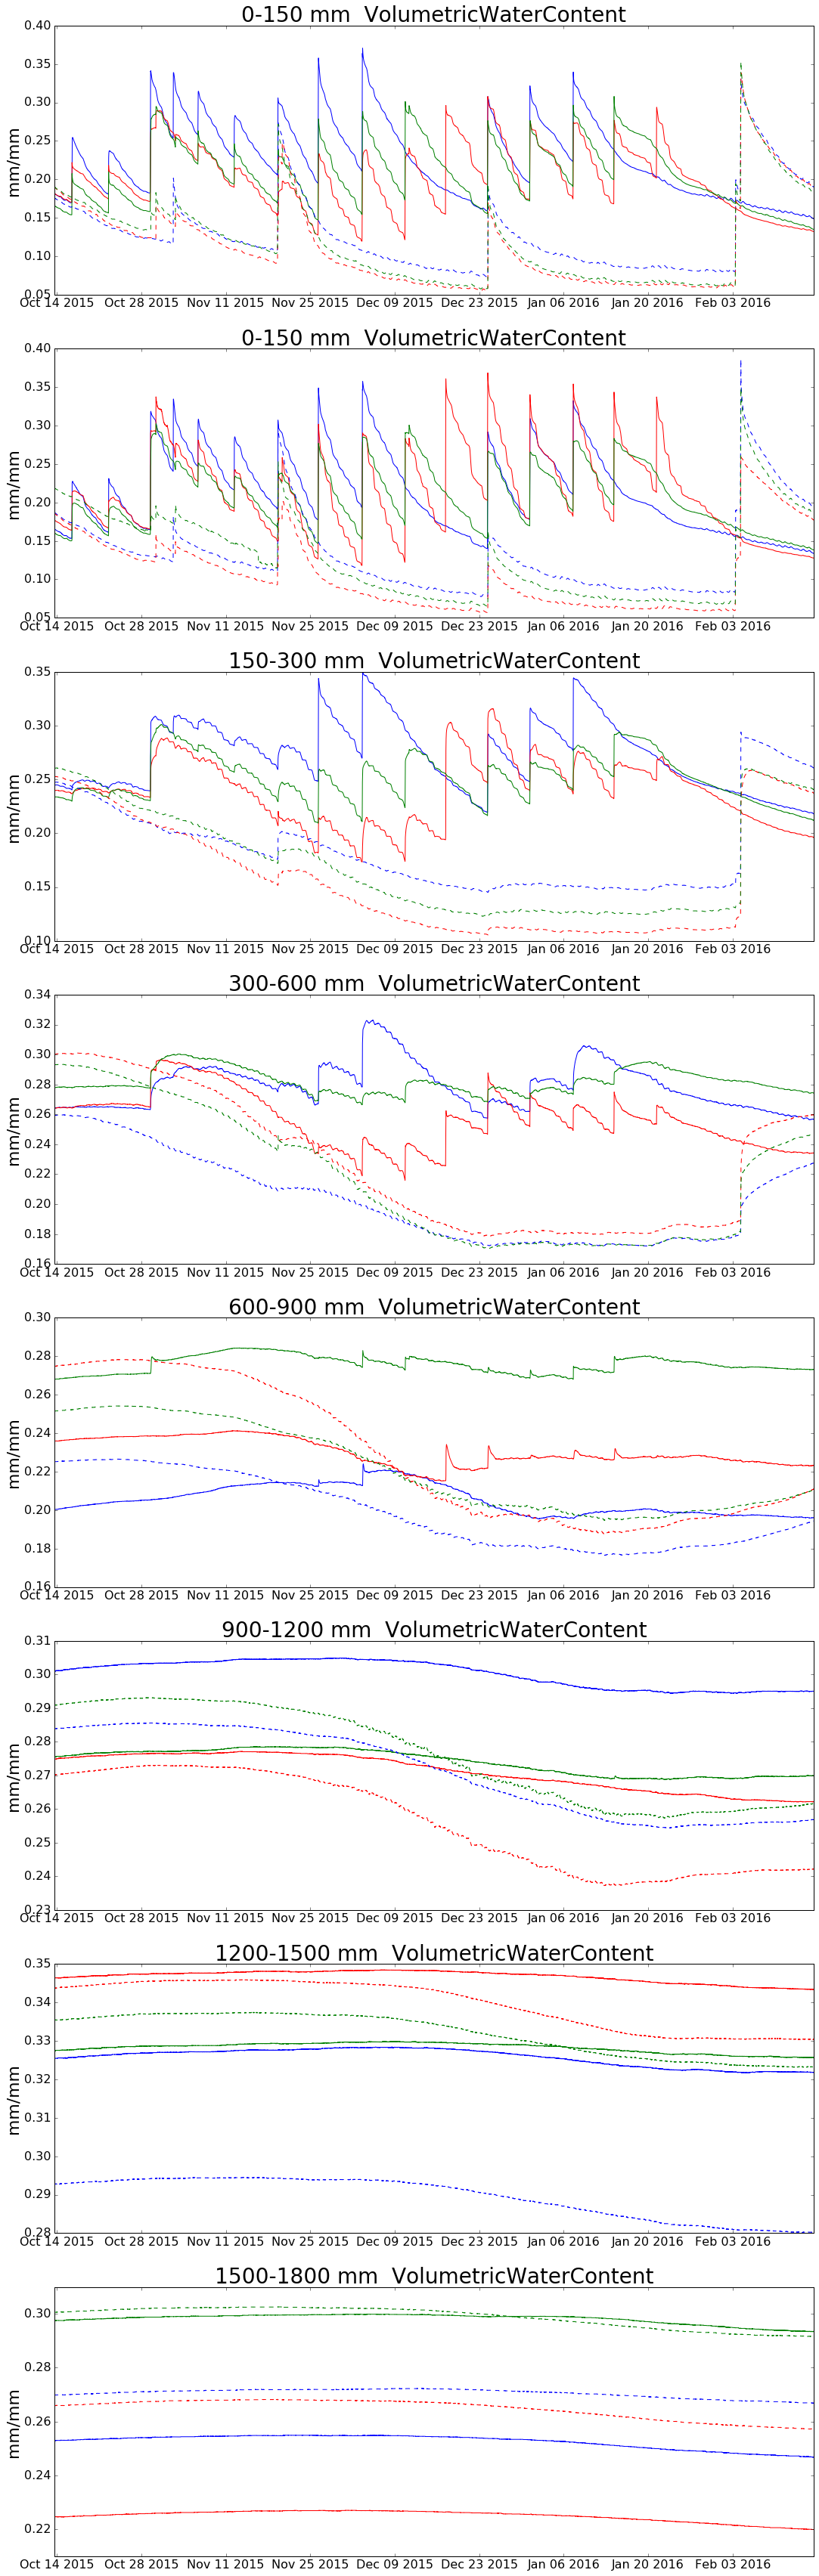

In [6]:
DataMeans3 = FieldData.ix['2015-10-10':,'VolumetricWaterContent'].groupby(level=['Irrigation', 'Depth','Nitrogen'],axis=1).mean()

Fig = plt.figure(figsize=(18, 60))

def MakePlot(Position, Depth, DepthLabel):
        Fig.add_subplot(8,1,Position, color_cycle=['b','r','g','b','r','g'])
        plt.title(DepthLabel + '  VolumetricWaterContent', fontsize=28);
        plt.plot(DataMeans.index,DataMeans3.Irrigated.ix[:,Depth], '-');
        plt.plot(DataMeans.index,DataMeans3.Dryland.ix[:,Depth], '--');
        plt.ylabel('mm/mm', fontsize=22);
        plt.tick_params(labelsize=16);
        #plt.ylim(0,0.5);
        return;

MakePlot(1,'D1I','0-150 mm')
MakePlot(2,'D1B','0-150 mm')
MakePlot(3,'D2','150-300 mm')
MakePlot(4,'D3','300-600 mm')
MakePlot(5,'D4','600-900 mm')
MakePlot(6,'D5','900-1200 mm')
MakePlot(7,'D6','1200-1500 mm')
MakePlot(8,'D7','1500-1800 mm')

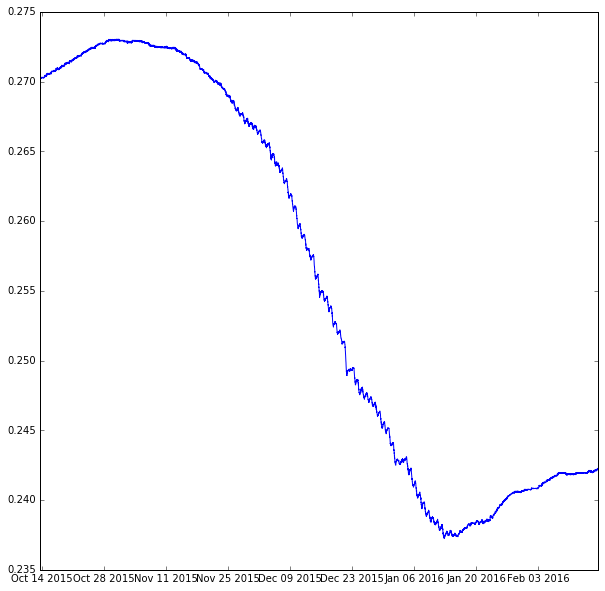

In [7]:
Graph = plt.figure(figsize=(10,10))
plt.plot(DataMeans.index,DataMeans3.Dryland.ix[:,'D5'].ix[:,'250'], '-');

In [8]:
DeltaWater = ProfileWater2.diff()
DeltaWater.to_pickle('.\DataFrames\ProfileWaterDelta.pkl')
SWD = SoilWaterDeficit.resample('D').mean()
SWD.to_pickle('.\DataFrames\DailySWD.pkl')

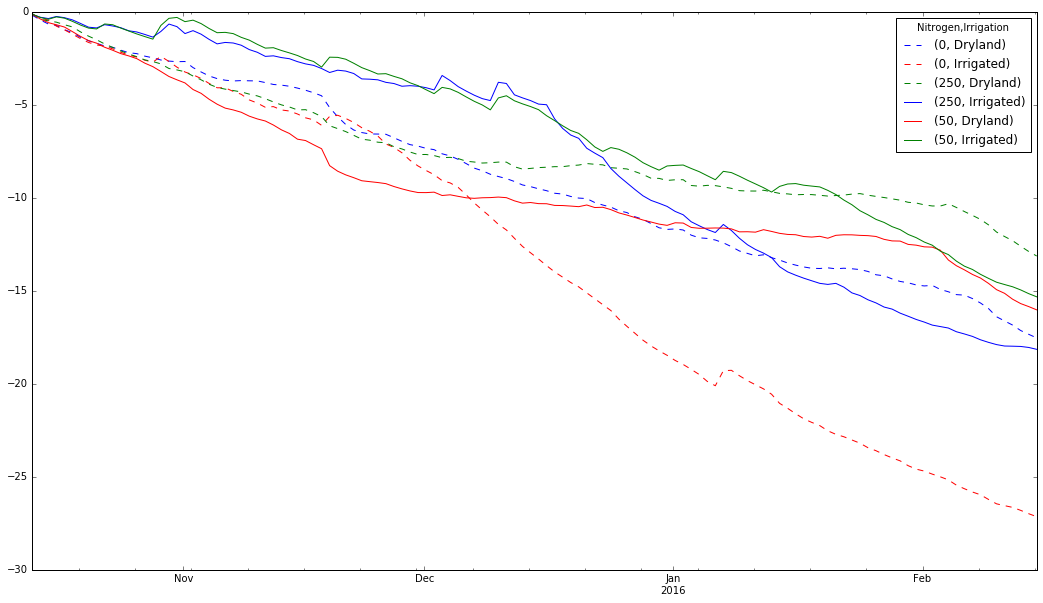

In [9]:
DarkWaterDeltas = DeltaWater.ix[DeltaWater.index.indexer_between_time(datetime.time(23),datetime.time(4))]
DarkWaterDeltas = DarkWaterDeltas.resample('24H', base=5).sum()#Base of 5 means sampling from 6am to 6am
MeanDarkWaterDeltas = DarkWaterDeltas.groupby(level=['Nitrogen','Irrigation'],axis=1).mean()
MeanDarkWaterDeltas.cumsum().plot( figsize=(18,10), style=['b--','r--','g--','b-','r-','g-'])

## Upward flux appers to be small so lets ignor it

## Work out irrigation timings and amounts

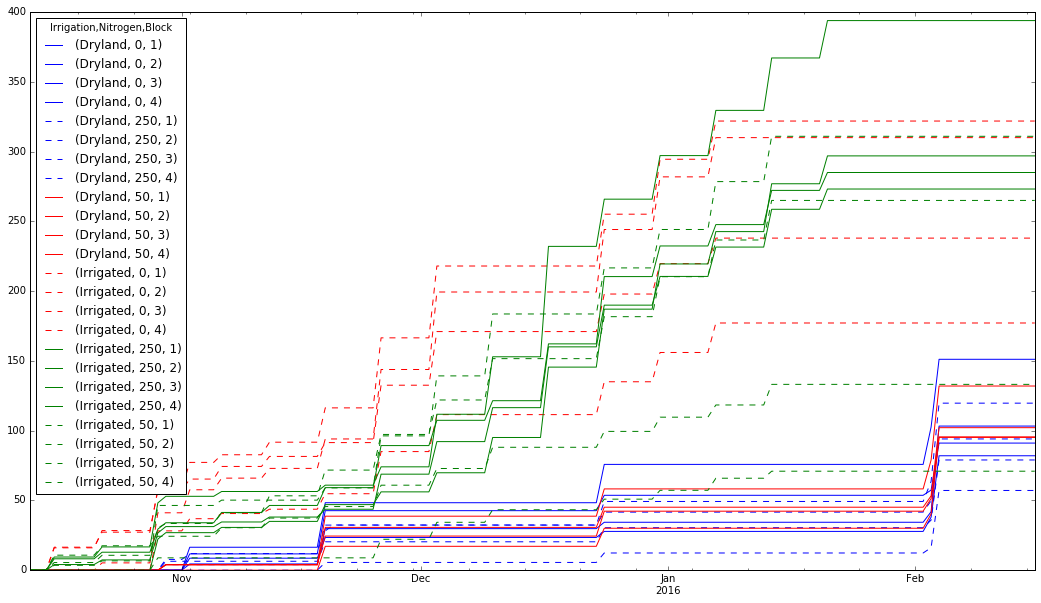

In [10]:
Irrigation = DeltaWater.where(DeltaWater > 3)
Irrigation = Irrigation.resample('D').sum()
Irrigation.fillna(0, inplace = True)
AccumIrrig = Irrigation.cumsum()
AccumIrrig.plot( figsize=(18,10), style=['b-','b-','b-','b-','b--','b--','b--','b--','r-','r-','r-','r-','r--','r--','r--','r--','g-','g-','g-','g-','g--','g--','g--','g--'])

## Calculate profile water content deltas for each 1 hour measurement period and drop out positive values which are when irrigation when on

(0, 500)

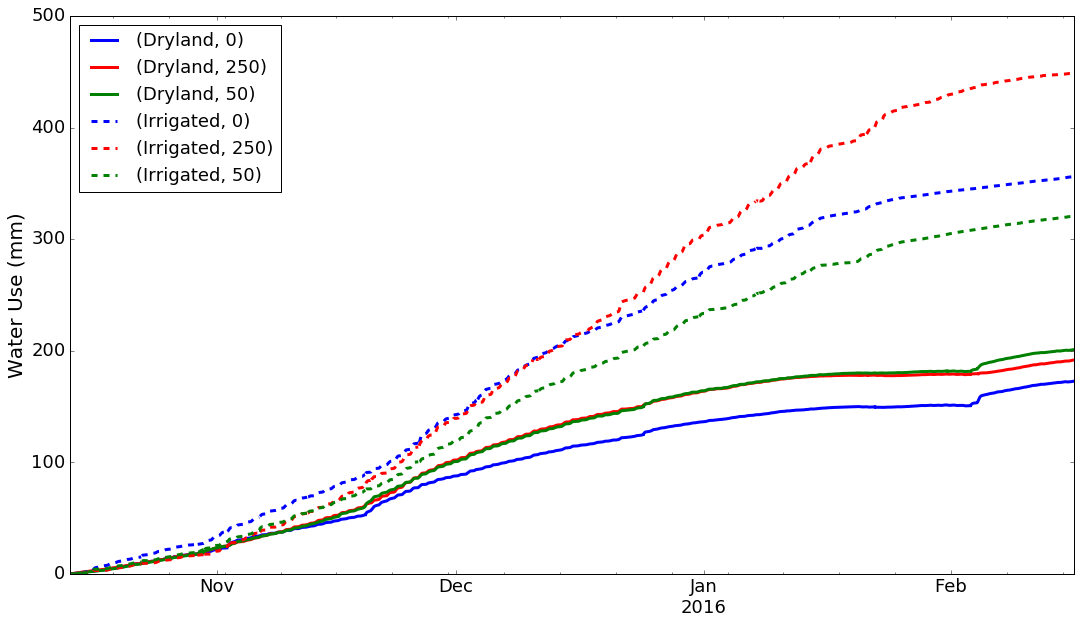

In [11]:
WaterDeltaHourly = DeltaWater.resample('h').sum()
WaterDeltaHourly.where(WaterDeltaHourly<.1,inplace=True)
#WaterUseHourly['2015-01-03':'2015-01-20'].plot(ylim = (-3,2), legend = False, figsize=(18,18),style=['b-','b-','b-','b-','b--','b--','b--','b--','r-','r-','r-','r-','r--','r--','r--','r--','g-','g-','g-','g-','g--','g--','g--','g--'])
MeanWaterDeltaHourly = WaterDeltaHourly.groupby(level=['Irrigation', 'Nitrogen'],axis=1).mean()
MeanWaterDeltaHourly.cumsum().multiply(-1).plot(figsize=(18,10),style=['b-','r-','g-','b--','r--','g--'],lw=3)
plt.ylabel('Water Use (mm)',fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=18,loc=2)
plt.ylim(0,500)

In [24]:
np.multiply(WaterDeltaHourly.resample('d').sum(),-1).to_excel('DailyWUbyPlot.xlsx')

In [ ]:
WaterDeltaHourly.to_excel()